# Homework12: Intro to Machine Learning

### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine learning (ML) is helpful when trying to find causal relationships, glean meaningful patterns about your data and/or when making predictions. These objectives are typically achieved through either supervised or unsupervised ML. 

Knowing whether to use ML as opposed to other strategies depends on 1) what data you have available and 2) what questions you are trying to answer. A basic non-machine learning question might be, “how did our sales this month compare to our sales last month?” To determine that, we could simply find the total sales for the current month and calculate the difference from the previous month. In other words, ML is not needed when simply describing a data set. One can plot a basic distribution of data, compute descriptive statistics (e.g. mean, median, mode, IQR), and even find correlations between variables without utilizing ML techniques. 

Sometimes, we want to answer questions that cannot be determined through mere descriptive statistics. This is when we utilize ML. For example, a question that requires ML might be, “Can the characteristics of a customer predict how much they will purchase from us next year?” To answer this, we would need to utilize the data we have in order to predict the future. That could be through a regression (supervised learning). An additional question might be, “Can we identify patterns in our customers, based on their purchasing habits?” This question would utilize an unsupervised ML technique to answer. 

In sum, if a business question is descriptive in nature and can be answered without building any models, then it is not machine learning. If a business question is predictive, seeks to find causality, and/or wants to ascertain patterns, then machine learning models/techniques are needed. 

### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

Examples of possible pre-processing steps:
1. Cleaning up null values
2. Data cleaning (dashes, odd characters, etc)
3. Handle missing data
4. Remove extreme outliers
5. One-Hot encoding
6. Convert Categorical values to numerical (sometimes that is the same as 3)
7. Standardization/Normalization
8. Deal with multicollinearity (can be caused by 3)

In [20]:
# Import libraries
import pandas as pd

# File to Load
loans = "loans_full_schema.csv"

# Read File and store into Pandas data frame
loans = pd.read_csv(loans)
loans_df = pd.DataFrame(loans)

# View data frame
print(str(len(loans_df.index))+' rows and 55 features')
loans_df.head()

10000 rows and 55 features


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [13]:
# Check column names and data types of each column
loans_df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [7]:
# Examine basic descriptive statistics for each variable
loans_df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


**1. Clean up null values**

In [14]:
# First, check which variables have null values
loans_df.isnull().sum()

# Nulls include:
### emp_title                            833 object
### emp_length                           817 float64
### debt_to_income                        24 float64
### annual_income_joint                 8505 float64
### verification_income_joint           8545 object
### debt_to_income_joint                8505 float64
### months_since_last_delinq            5658 float64
### months_since_90d_late               7715 float64
### months_since_last_credit_inquiry    1271 float64
### num_accounts_120d_past_due           318 float

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [28]:
null_list = ['emp_title','emp_length','debt_to_income','annual_income_joint','verification_income_joint',
            'debt_to_income_joint','months_since_last_delinq','months_since_90d_late',
             'months_since_last_credit_inquiry','num_accounts_120d_past_due']

for variable in null_list:
    Percent_null = round((loans_df[variable].isnull().sum()/10000)*100,2)
    print(variable + ' = ' + str(Percent_null)+'%')

emp_title = 8.33%
emp_length = 8.17%
debt_to_income = 0.24%
annual_income_joint = 85.05%
verification_income_joint = 85.45%
debt_to_income_joint = 85.05%
months_since_last_delinq = 56.58%
months_since_90d_late = 77.15%
months_since_last_credit_inquiry = 12.71%
num_accounts_120d_past_due = 3.18%


### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

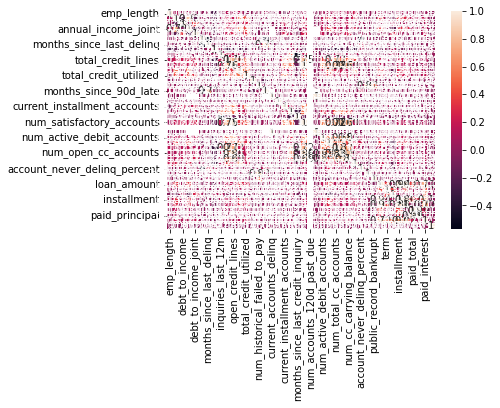

In [15]:
# Create a correlation matrix
corrMatrix = loans_df.corr()

# load necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visually display the matrix from above
sn.heatmap(corrMatrix, annot=True)
plt.show()

### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

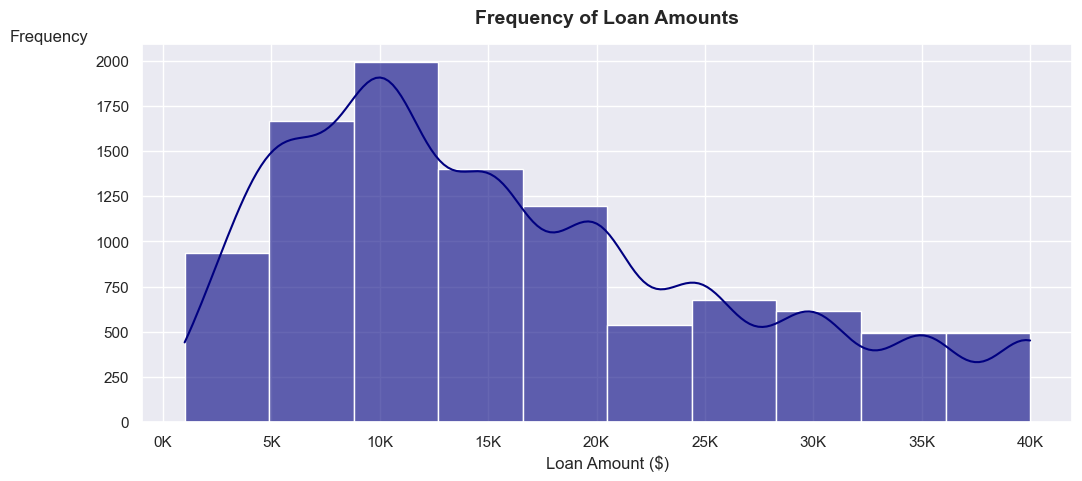

In [56]:
import warnings
warnings.filterwarnings('ignore')

# Set the style
sns.set(style="darkgrid") 

# Create the histogram
g = sns.histplot(x='loan_amount',
                 bins=10,
                 color='navy',
                 alpha=0.6,
                 kde=True, # add kernal density line to smooth out variation when looking at distribution
                 data=loans_df)

# Create value for xlabels to make them easier to read
# Change format to be values in K amounts (divide the value by 1000)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# Set the xticks to be edited values
g.set_xticklabels(xlabels)
# Add x-axis label
g.set_xlabel('Loan Amount ($)', size=12)

# Adjust the y-axis label to be horizontal 
g.set_ylabel('Frequency', size=12, rotation='horizontal') 
# Add label to the top, so that it is easier to read
g.yaxis.set_label_coords(-0.1,1)

# Add plot title 
g.set_title('Frequency of Loan Amounts', size=14, weight='bold', pad=15)

# Make plots larger
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

plt.show()

**Explanation:** The histogram above displays a right-skewed distribution. This indicates that a higher concentration of individuals request smaller loans. Most loans are between $\$10,000$ and $\$15,000$. In general, as the loan amount increases, the frequency of people requesting that loan *decreases.*

I selected a bin size of '10' because this value allowed me to more clearly see the positively skewed distribution. I experimented with bin sizes ranging from 5 to 50. A bin size of 5 is too small to see the distribution. However, bin sizes greater than 10 also clouded the overall distribution. This could be due to the nature of this variable. For example, loans are often selected in larger amounts, rather than granular dollar amounts.

In [55]:
loans_df['loan_amount'].describe()

count    10000.000000
mean     16361.922500
std      10301.956759
min       1000.000000
25%       8000.000000
50%      14500.000000
75%      24000.000000
max      40000.000000
Name: loan_amount, dtype: float64

### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

In [2]:
# My function to convert states into regions
def state_to_region(s):
    
    # List of pacific states
    Pacific = ['WA','OR','ID','CA','NV','UT','AZ','AK', 'HI']
    # List of plains states
    Plains = ['MT','SD','ND','WY','NE','CO','KS','NM','TX','OK']
    # List of midwest states
    Midwest = ['MN','WI','MI','IA','MO','IL','IN','OH','KY']
    # List of northeast states
    Northeast = ['ME','VT','NH','MA','RI','CT','NY','NJ','PA','DE','MD','WV','VA']
    # List of southern states
    South = ['AR','TN','NC','LA','MS','AL','GA','FL', 'SC']    
    
    # series of if else statements to check if a state is in one of the lists
    # return the correct region, if true
    if (s in Pacific):
        return 'Pacific'
    elif (s in Plains):
        return 'Plains'
    elif (s in Midwest):
        return 'Midwest'
    elif (s in Northeast):
        return 'Northeast'
    else:
        return 'South'

# test function
state_to_region('SD')

'Plains'

In [3]:
# Apply my created function to lambda
loans_df['region'] = loans_df.apply(lambda x: state_to_region(x['state']), axis=1)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


**a. Is there a better way to do this than with a lambda?** 

There is likely a better method to use, rather than lambda. This is likely because we are not needing to utilize it with a higher-order function, such as map, filter, or reduce. It does not seem to be a situation where lambda works best.

**b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.** 

I decided to use a lambda (above) and a different technique (below). I was curious to know whether it would be faster to call my created function within a lambda, or to call it without the lambda (see code below).

After completing the code, I tested the two functions to see which performed better. I saw that the non-lambda way was much more efficient. The timer displayed 0.26 for the lambda way, but only 0.02 for the non-lambda way. That is a pretty big difference!

In [4]:
# Use a non-lambda way
loans_df['region2'] = loans_df['state'].apply(state_to_region)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,region2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific,Pacific


In [5]:
# Test to see which method was faster!

import time # to use the timer function

# Lambda way
start_time1 = time.perf_counter()
loans_df.apply(lambda x: state_to_region(x['state']), axis=1)
end_time1 = time.perf_counter()

# See the total time it takes to run the function
total_time1 = end_time1-start_time1
print('Lambda way: ' + str(round(total_time1,2)))


# Other way
start_time2 = time.perf_counter()
loans_df['state'].apply(state_to_region)
end_time2 = time.perf_counter()

# See the total time it takes to run the function
total_time2 = end_time2-start_time2
print('Other way: ' + str(round(total_time2,2)))

Lambda way: 0.26
Other way: 0.02


## 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [6]:
# Filter the data sets by Region for plots below
Pacific = loans_df[loans_df['region']=='Pacific']
Plains = loans_df[loans_df['region']=='Plains']
Midwest = loans_df[loans_df['region']=='Midwest']
Northeast = loans_df[loans_df['region']=='Northeast']
South = loans_df[loans_df['region']=='South']

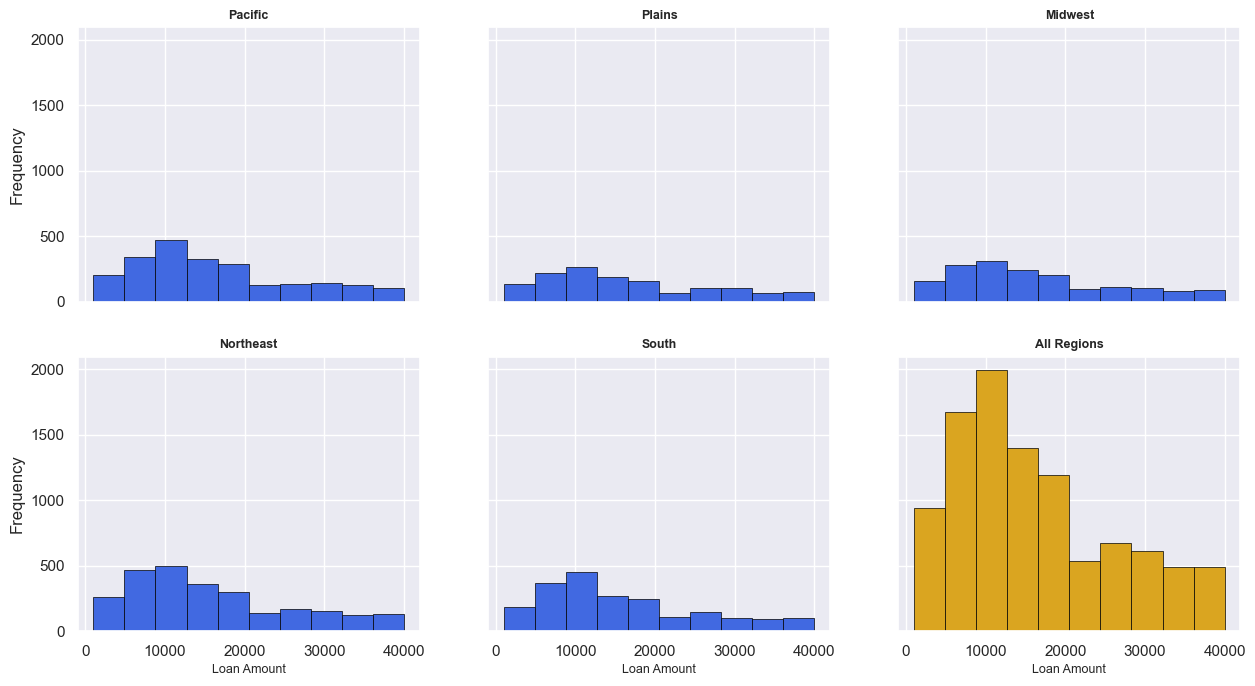

In [13]:
# load necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="darkgrid") 

# Set up axes for subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,8))

# Pacific on first axis
ax1.hist(Pacific['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax1.set_title('Pacific', size=9, weight='bold')
ax1.set_ylabel('Frequency')

# Plains on second axis
ax2.hist(Plains['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax2.set_title('Plains', size=9, weight='bold')

# Midwest on third axis
ax3.hist(Midwest['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax3.set_title('Midwest', size=9, weight='bold')

# Northeast on fourth axis
ax4.hist(Northeast['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax4.set_title('Northeast', size=9, weight='bold')
ax4.set_xlabel('Loan Amount', size=9)
ax4.set_ylabel('Frequency')

# South on fifth axis
ax5.hist(South['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax5.set_title('South', size=9, weight='bold')
ax5.set_xlabel('Loan Amount', size=9)

# All together on sixth axis
ax6.hist(loans_df['loan_amount'], bins=10, color='goldenrod', edgecolor='black', linewidth=0.5)
ax6.set_title('All Regions', size=9, weight='bold')
ax6.set_xlabel('Loan Amount', size=9)

# Make plots larger
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

**Summary of Findings:** In general, the distributions do not vary that much by region. All regions have a positively skewed distribution. However, the plains region follows a uniform distribution more closely, when compared to other regions. The Pacific and Northeast regions have the sharpest skew, with most people requesting a smaller loan amount.

### 7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful.

1. What types of training (degrees, 'bootcamps,' 'work experience,' 'online courses,' etc.) best prepared you for your current roles? 
2. Which math courses would be most helpful to take, if interested in a data science career? 
3. For Brittany: Which skills from LaunchCode do you use most often in your work? 
4. How demanding is a data science career (in terms of work-life balance)?

## Data Camp Certificates

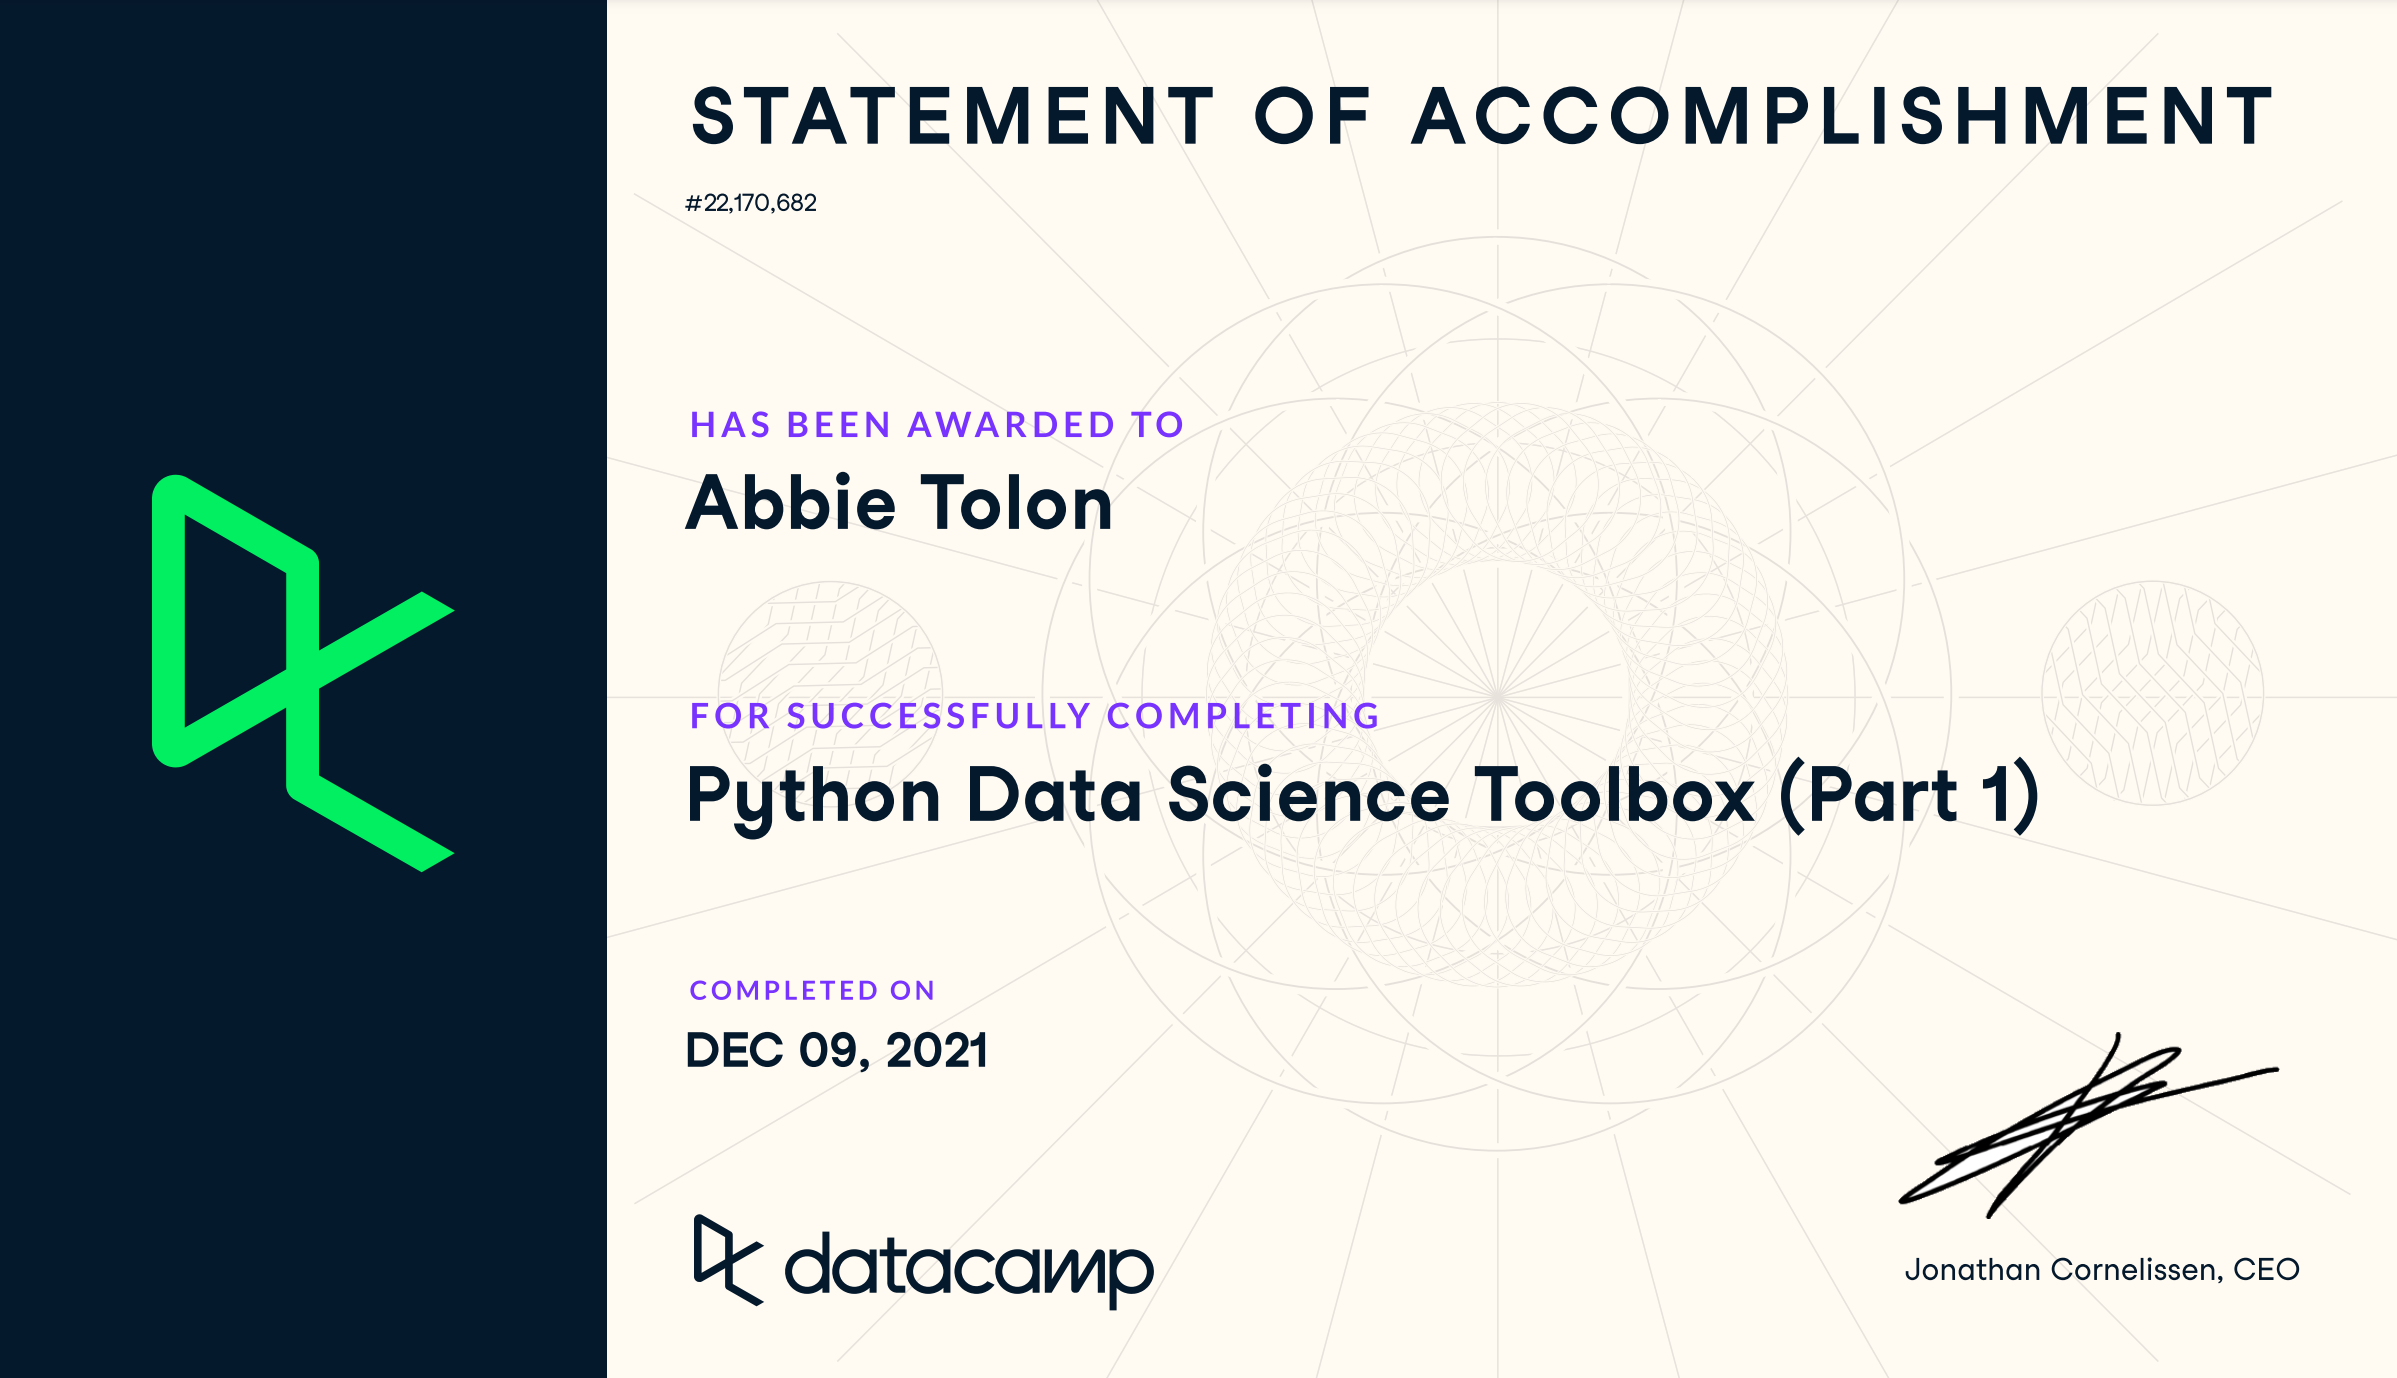